<a href="https://colab.research.google.com/github/ashleyferreiraa/Big-Data-Analytics-project/blob/main/Data_Analytics_Project_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add the 3 economic factors data sets :

1. GDP
2. Mortgage Rates
3. Unemployment rates


Download,load and preprocess the **Gross Domestic Porduct (GDP) / capita data**

In [ ]:
file_path='/content/GDP.csv'
GDP= pd.read_csv(file_path)

GDP= GDP[GDP['Country Name'] == 'Canada']

GDP= GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Country Name'])

# Transpose the DataFrame
GDP_transposed = GDP.T.reset_index()

# Rename the columns to 'Year' and 'GDP'
GDP_transposed.columns = ['Year', 'GDP']

#remove the first row
GDP_transposed = GDP_transposed.iloc[1:]
#remove the last row
GDP_transposed= GDP_transposed[:-1]

print(GDP_transposed.head())

   Year          GDP
1  1961  2246.083566
2  1962  2274.428471
3  1963  2380.317329
4  1964  2561.638491
5  1965  2777.183173


Download,load and preprocess the **Mortgage Rates data**

In [ ]:
import pandas as pd

file_path='/content/Mortgage Rates.csv'
mortgage_rates= pd.read_csv(file_path)

# Drop unnecessary columns
mortgage_rates= mortgage_rates.drop(columns=['Conventional mortgage - 1-year', 'Conventional mortgage - 3-year', 'Prime rate'])

# Convert 'date' column to datetime
mortgage_rates['date'] = pd.to_datetime(mortgage_rates['date'])

# Extract the year from the 'date' column
mortgage_rates['Year'] = mortgage_rates['date'].dt.year

# Group data by year and calculate the mean value for each year
mortgage_rates = mortgage_rates.groupby('Year')['Conventional mortgage - 5-year'].mean()

# Rename the mortgage rate column
mortgage_rates = mortgage_rates.rename("Mortgage rate")

# Reset index to make 'Year' a regular column
mortgage_rates = mortgage_rates.reset_index()

print(mortgage_rates.head())



   Year  Mortgage rate
0  1975      11.377358
1  1976      11.817308
2  1977      10.298077
3  1978      10.490385
4  1979      12.052885


Download,load and preprocess the **unemployment rates data**

DOUBEL CHECK - I MIGHT BE DOUBLE COUNTING THERE IS A CATEGORY UNDER GENDER THAT SAYS ALL GENDER total

In [ ]:
import pandas as pd

file_path='/content/Unemployment Rates.csv'
unemployment_rates= pd.read_csv(file_path)


# Filter unemployment_rates for Canada ONLY
canada_unemployment = unemployment_rates[unemployment_rates['GEO'] == 'Canada']

#Select only the desired columns
canada_unemployment = canada_unemployment[['REF_DATE', 'GEO', 'VALUE']]

#get only yearly unemployment rate values

#Turn RED_DATE to date time
canada_unemployment['REF_DATE'] = pd.to_datetime(canada_unemployment['REF_DATE'])

# Extract the year from the 'REF_DATE' column
canada_unemployment['Year'] = canada_unemployment['REF_DATE'].dt.year

# Group data by year and calculate the mean value for each year
yearly_unemployment = canada_unemployment.groupby('Year')['VALUE'].mean()

yearly_unemployment = yearly_unemployment.rename("Unemployment rate")

# Reset the index to make 'Year' a regular column
yearly_unemployment = yearly_unemployment.reset_index()


print(yearly_unemployment.head())


   Year  Unemployment rate
0  1976           3.650382
1  1977           4.189545
2  1978           4.430369
3  1979           3.897901
4  1980           3.880271


Upload target variable - **New housing price index (NHPI) data**

In [ ]:
import pandas as pd
import zipfile
import requests
import os

# Step 1: Download the ZIP file
url = 'https://www150.statcan.gc.ca/n1/tbl/csv/18100205-eng.zip'
zip_path = 'housing_data.zip'

response = requests.get(url)
with open(zip_path, 'wb') as file:
    file.write(response.content)

# Step 2: Extract the ZIP file
extract_path = 'housing_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Find the CSV file inside the extracted folder
csv_file = [f for f in os.listdir(extract_path) if f.endswith('.csv')][0]
csv_path = os.path.join(extract_path, csv_file)

# Step 4: Load the CSV into a Pandas DataFrame
data = pd.read_csv(csv_path)

# Display the first few rows
print(data.head())


  REF_DATE              GEO           DGUID New housing price indexes  \
0  1981-01           Canada  2016A000011124    Total (house and land)   
1  1981-01           Canada  2016A000011124                House only   
2  1981-01           Canada  2016A000011124                 Land only   
3  1981-01  Atlantic Region      2016A00011    Total (house and land)   
4  1981-01  Atlantic Region      2016A00011                House only   

                 UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID      VECTOR  COORDINATE  \
0  Index, 201612=100     347         units          0  v111955442         1.1   
1  Index, 201612=100     347         units          0  v111955443         1.2   
2  Index, 201612=100     347         units          0  v111955444         1.3   
3  Index, 201612=100     347         units          0  v111955445         2.1   
4  Index, 201612=100     347         units          0  v111955446         2.2   

   VALUE STATUS  SYMBOL  TERMINATED  DECIMALS  
0   38.2    NaN     NaN   

In [ ]:

# Filter for Canada and Total (house and land)
NHPI_data = data[(data['GEO'] == 'Canada') & (data['New housing price indexes'] == 'Total (house and land)')]

# Keep only the 'REF_DATE' and 'VALUE' columns
NHPI_data = NHPI_data[['REF_DATE', 'VALUE']]

#get only yearly values

#Turn RED_DATE to date time
NHPI_data['REF_DATE'] = pd.to_datetime(NHPI_data['REF_DATE'])

# Extract the year from the 'REF_DATE' column
NHPI_data['Year'] = NHPI_data['REF_DATE'].dt.year

# Group data by year and calculate the mean value for each year
NHPI_data = NHPI_data.groupby('Year')['VALUE'].mean()

NHPI_data = NHPI_data.rename("NHPI")

# Reset the index to make 'Year' a regular column
NHPI_data = NHPI_data.reset_index()

print(NHPI_data.head())


   Year       NHPI
0  1981  40.008333
1  1982  39.158333
2  1983  37.875000
3  1984  38.016667
4  1985  38.475000


COMBINE ALL 3 DATA SETS

In [ ]:
# Merge the dataframes
merged_data = pd.merge(NHPI_data, yearly_unemployment, on='Year', how='inner')
merged_data = pd.merge(merged_data, mortgage_rates, on='Year', how='inner')

# Convert 'Year' column to int before merging
GDP_transposed['Year'] = GDP_transposed['Year'].astype(int)
merged_data= pd.merge(merged_data, GDP_transposed, on='Year', how='inner')

print(merged_data.head())

   Year       NHPI  Unemployment rate  Mortgage rate          GDP
0  1981  40.008333           3.891040      18.350962  12379.03686
1  1982  39.158333           5.777962      18.149038  12527.31353
2  1983  37.875000           6.733969      13.283654  13477.10317
3  1984  38.016667           6.342140      13.596154  13930.47455
4  1985  38.475000           6.026463      12.168269  14170.12494


In [ ]:

# Check for missing values in the merged dataset
print(merged_data.isnull().sum())

# Check data types of each column
merged_data.dtypes


NHPI                 0
Unemployment rate    0
Mortgage rate        0
GDP                  0
dtype: int64


,0
NHPI,float64
Unemployment rate,float64
Mortgage rate,float64
GDP,float64


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1981 to 2022
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NHPI               42 non-null     float64
 1   Unemployment rate  42 non-null     float64
 2   Mortgage rate      42 non-null     float64
 3   GDP                42 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


                       NHPI  Unemployment rate  Mortgage rate       GDP
NHPI               1.000000           0.110481      -0.793074  0.955736
Unemployment rate  0.110481           1.000000      -0.408373  0.134193
Mortgage rate     -0.793074          -0.408373       1.000000 -0.800903
GDP                0.955736           0.134193      -0.800903  1.000000


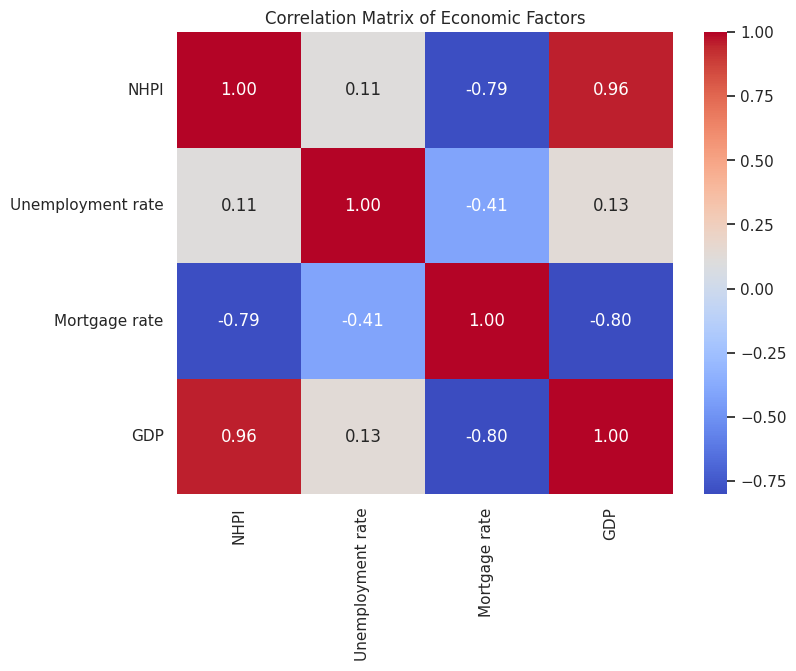

In [ ]:

# Calculate the correlation matrix
correlation_matrix = merged_data.drop(columns=['Year']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Factors')
plt.show()


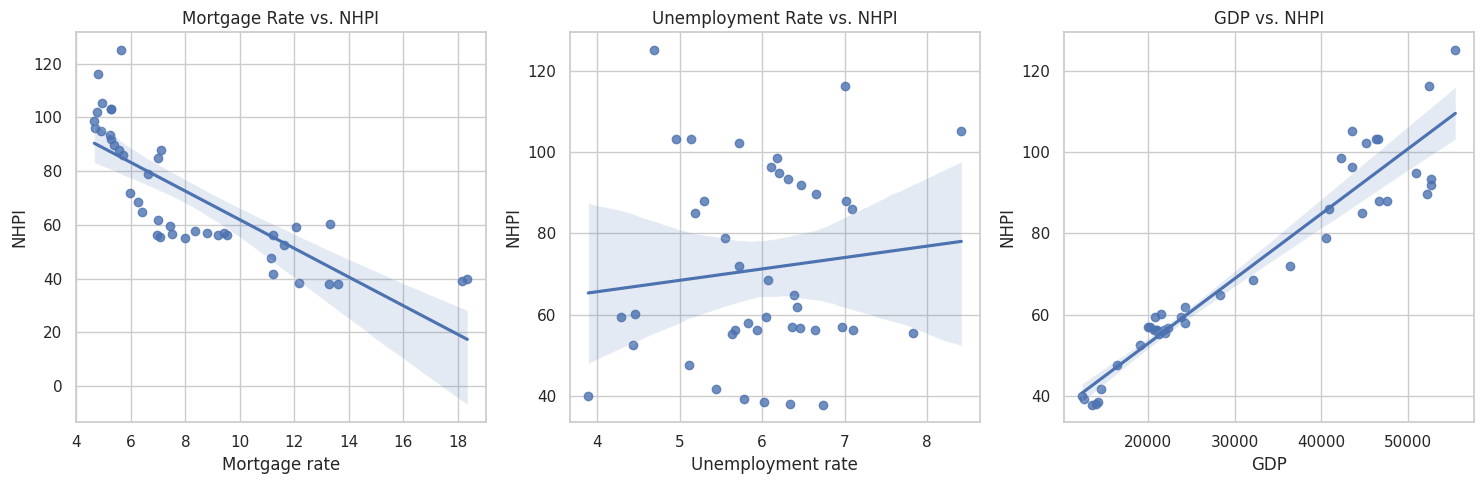

In [ ]:

# Create scatter plots and regression lines
plt.figure(figsize=(15, 5))

# Mortgage Rate vs. NHPI
plt.subplot(1, 3, 1)
sns.regplot(x='Mortgage rate', y='NHPI', data=merged_data)
plt.title('Mortgage Rate vs. NHPI')

# Unemployment Rate vs. NHPI
plt.subplot(1, 3, 2)
sns.regplot(x='Unemployment rate', y='NHPI', data=merged_data)
plt.title('Unemployment Rate vs. NHPI')

# GDP vs. NHPI
plt.subplot(1, 3, 3)
sns.regplot(x='GDP', y='NHPI', data=merged_data)
plt.title('GDP vs. NHPI')

plt.tight_layout()
plt.show()


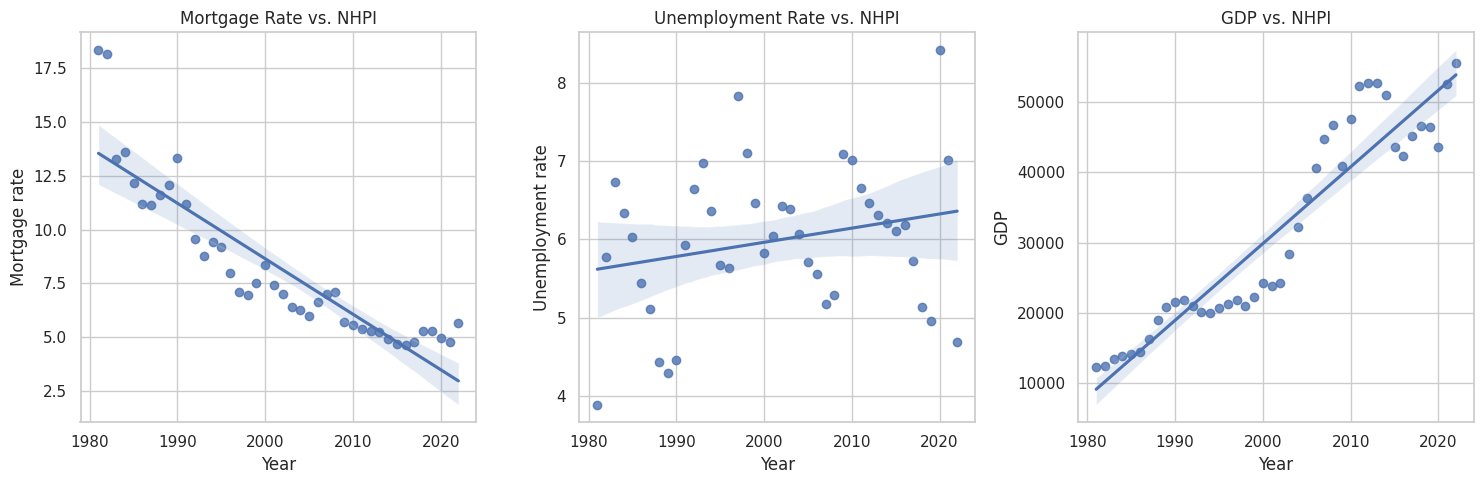

In [ ]:
# Reset index before plotting to make 'Year' a column again
merged_data = merged_data.reset_index()

# Create scatter plots and regression lines
plt.figure(figsize=(15, 5))

# Mortgage Rate vs. NHPI
plt.subplot(1, 3, 1)
sns.regplot(x='Year', y='Mortgage rate', data=merged_data)
plt.title('Mortgage Rate vs. NHPI')

# Unemployment Rate vs. NHPI
plt.subplot(1, 3, 2)
sns.regplot(x='Year', y='Unemployment rate', data=merged_data)
plt.title('Unemployment Rate vs. NHPI')

# GDP vs. NHPI
plt.subplot(1, 3, 3)
sns.regplot(x='Year', y='GDP', data=merged_data)
plt.title('GDP vs. NHPI')

plt.tight_layout()
plt.show()

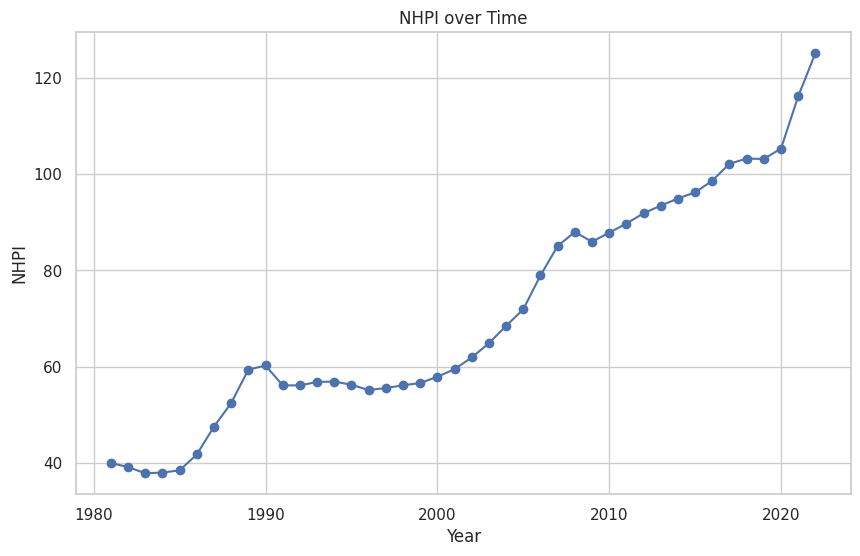

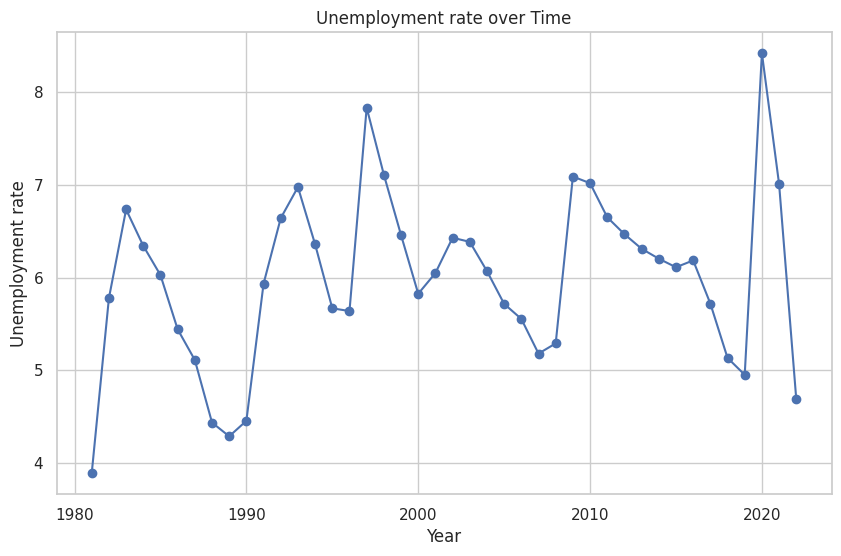

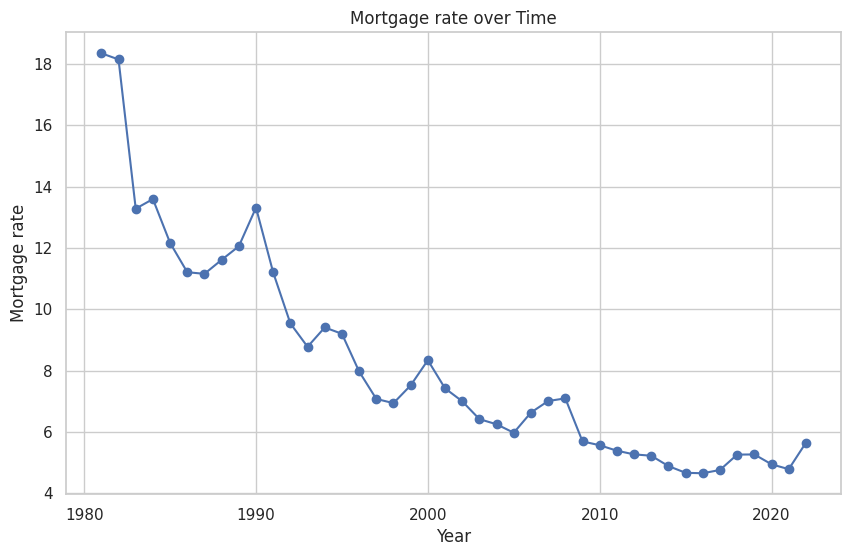

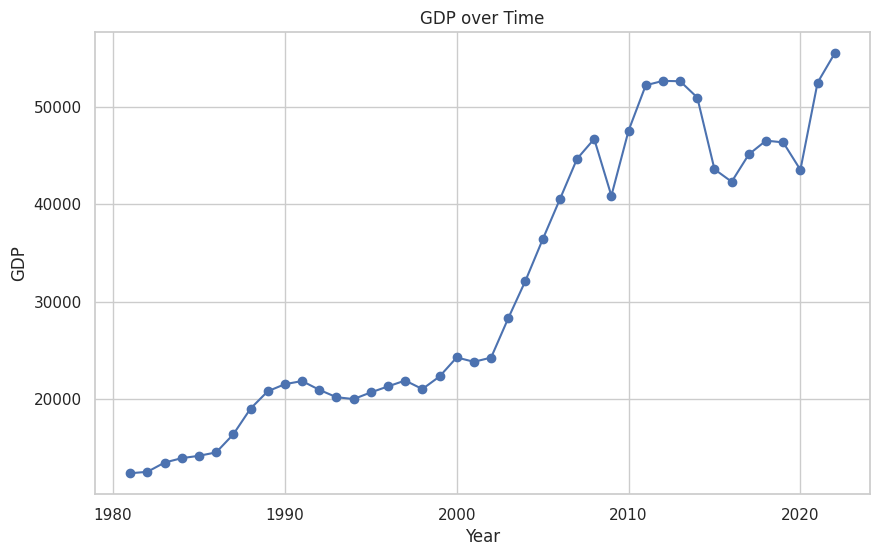

In [ ]:
# prompt: for each variable in merged data create a line graph against Year

# Assuming 'merged_data' DataFrame is already created as in the provided code.

for column in merged_data.columns:
  if column != 'Year':  # Skip the 'Year' column itself
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data[column], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} over Time')
    plt.grid(True)
    plt.show()


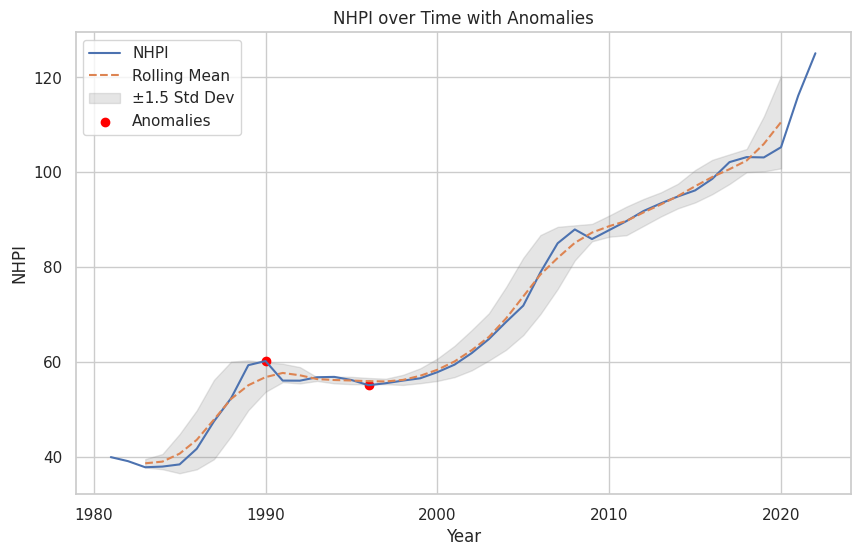

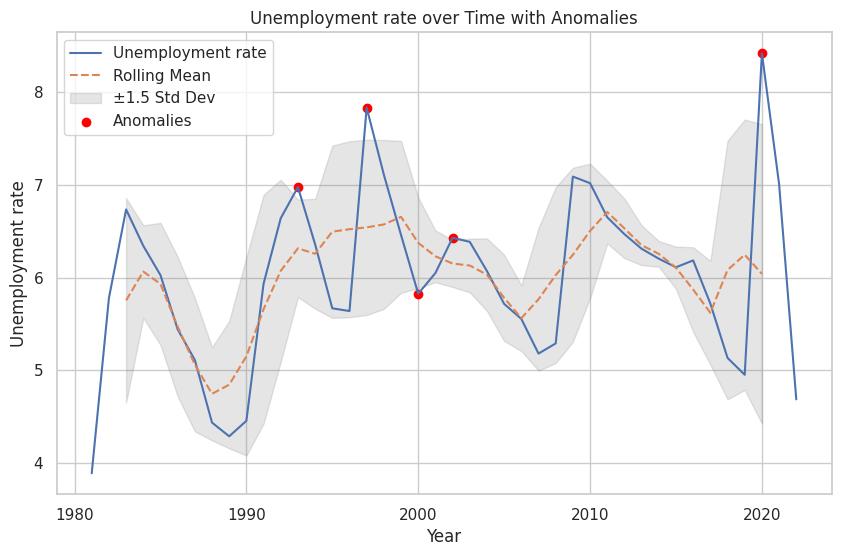

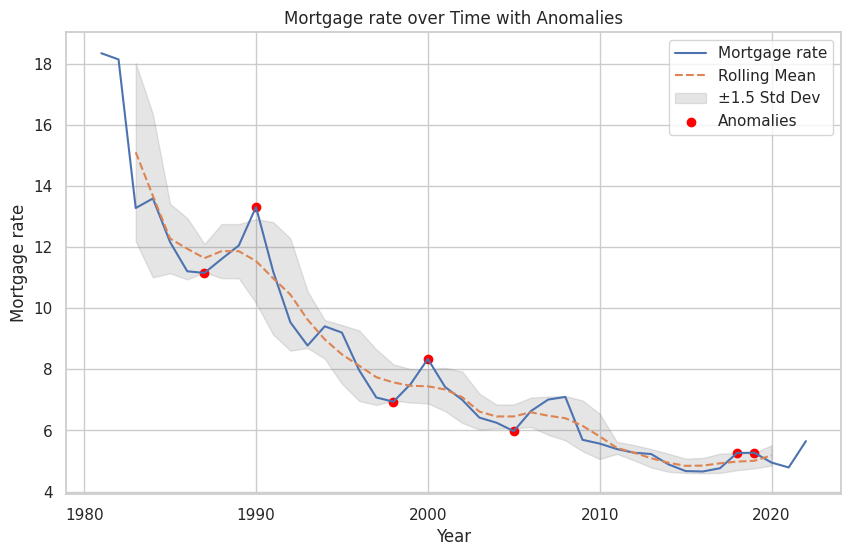

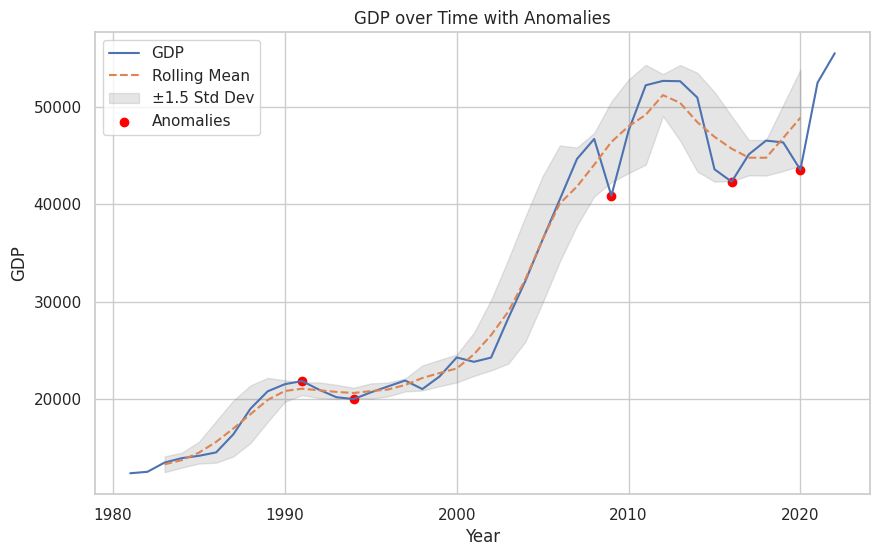

In [ ]:


import matplotlib.pyplot as plt


for column in merged_data.columns:
    if column not in ['Year', 'index']:  # Skip 'Year' and index column
        # Extract the data for the current column
        data_column = merged_data[column]

        # Calculate rolling mean and standard deviation
        rolling_mean = data_column.rolling(window=5, center=True).mean()
        rolling_std = data_column.rolling(window=5, center=True).std()

        # Define anomaly threshold
        upper_bound = rolling_mean + 1 * rolling_std
        lower_bound = rolling_mean - 1 * rolling_std

        # Identify anomalies
        anomalies = data_column[(data_column > upper_bound) | (data_column < lower_bound)]

        # Plot the data with anomalies highlighted
        plt.figure(figsize=(10, 6))
        plt.plot(merged_data['Year'], data_column, label=column)
        plt.plot(merged_data['Year'], rolling_mean, label='Rolling Mean', linestyle='dashed')
        plt.fill_between(merged_data['Year'], lower_bound, upper_bound, color='gray', alpha=0.2, label='±1 Std Dev')
        plt.scatter(merged_data['Year'][anomalies.index], anomalies, color='red', label='Anomalies')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.title(f'{column} over Time with Anomalies')
        plt.legend()
        plt.grid(True)
        plt.show()
